# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import api_keys
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
#lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

#City for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # Replace spaces with %20 to create url correctly 
    city = city.replace(" ", "%20")
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:

        cities.append(city)

# Print the city count to confirm count
len(cities)

642

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# OpenWeatherMap API Key
api_key = api_keys.weather_api_key
# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key        

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

# Start the call counter 
record = 1

# Log file print statement
print(f"Beginning Data Retrieval")
print(f"-------------------------------")

#Loop through the cities in the city list 
for city in cities:  
    try: 
        response = requests.get(f"{url}&q={city}").json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        max_temp.append(response["main"]["temp_max"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        wind_speed.append(response["wind"]["speed"])
        city_record = response["name"]
        print(f"Processing Record {record} | {city_record}")
        print(f"{url}&q={city}")
        
        # Increase counter 
        record= record + 1
        
        # Wait in loop to not over exceed rate limit of API
        time.sleep(0.025)
        
    # If no record found skip to next call
    except:
        print("City not found. Skipping...")
    continue

Beginning Data Retrieval
-------------------------------
Processing Record 1 | Upernavik
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=48cd2f4c6e1cc4ac15520e0f752a9eb5&q=upernavik
Processing Record 2 | Albany
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=48cd2f4c6e1cc4ac15520e0f752a9eb5&q=albany
City not found. Skipping...
Processing Record 3 | Palana
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=48cd2f4c6e1cc4ac15520e0f752a9eb5&q=palana
Processing Record 4 | George Town
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=48cd2f4c6e1cc4ac15520e0f752a9eb5&q=georgetown
Processing Record 5 | Busselton
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=48cd2f4c6e1cc4ac15520e0f752a9eb5&q=busselton
Processing Record 6 | Ko Samui
http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=48cd2f4c6e1cc4ac15520e0f752a9eb5&q=ko%20samui
Processing Record 7 | Luangwa
http://api.openweatherma

In [5]:
# Create a dictonary with the lists generated
weatherpy_dictionary = {
    "City": city_name,
    "Cloudiness":cloudiness, 
    "Country":country,
    "Date":date, 
    "Humidity": humidity,
    "Lat":lat, 
    "Lng":lng, 
    "Max Temp": max_temp,
    "Wind Speed":wind_speed
}

# Create a data frame from dictionary
weather_data = pd.DataFrame(weatherpy_dictionary)

# Display count of weather data values 
weather_data.count()


City          590
Cloudiness    590
Country       590
Date          590
Humidity      590
Lat           590
Lng           590
Max Temp      590
Wind Speed    590
dtype: int64

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
#  Get the indices of cities that have humidity over 100%.


In [7]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


In [8]:
# Extract relevant fields from the data frame

weather_data.to_csv('../output_data/weather_data.csv')
# Export the City_Data into a csv
weather_data.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Upernavik,100,GL,1604937981,81,72.79,-56.15,-0.13,9.73
1,Albany,1,US,1604937967,81,42.60,-73.97,63.00,3.36
2,Palana,55,RU,1604938083,94,59.12,159.97,19.18,7.14
3,George Town,20,MY,1604937836,94,5.41,100.34,78.80,3.36
4,Busselton,57,AU,1604937962,69,-33.65,115.33,54.00,17.83


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

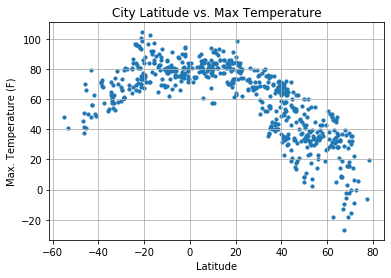

In [9]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature")
plt.ylabel("Max. Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output_data/Max_Temp_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Humidity Plot

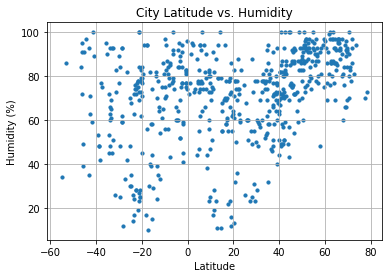

In [10]:
# Build a scatter plot for each data type
plt.scatter(weather_data["Lat"], weather_data["Humidity"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output_data/Humidity_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Cloudiness Plot

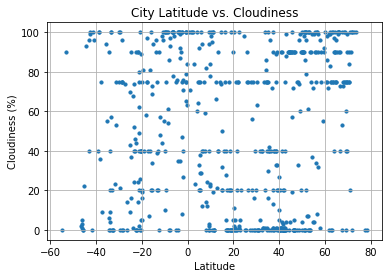

In [14]:
plt.scatter(weather_data["Lat"], weather_data["Cloudiness"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output_data/Cloudiness_vs_Latitude.png")

# Show plot
plt.show()

## Latitude vs. Wind Speed Plot

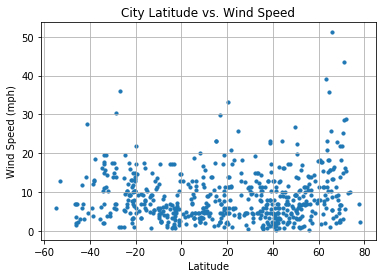

In [15]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], marker="o", s=10)

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../Output_data/Wind_Speed_vs_Latitude.png")

# Show plot
plt.show()

## Linear Regression

In [11]:
# OPTIONAL: Create a function to create Linear Regression plots

In [12]:
# Create Northern and Southern Hemisphere DataFrames

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression